<a href="https://colab.research.google.com/github/lauBit/relacion-minutos-ingreso/blob/main/Calidad_del_Vino_(Regresi%C3%B3n_Lineal_Lasso).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 – Predecir la calidad del Vino

Participantes:
- Paola Romero
- Laura Camelo
- Fernando Montaño
- Daniel Garcia

## **Explicación Breve del Problema**

El objetivo es plantear dos modelos para evaluar la calidad de las variedades rojas del vino portugués “Vinho Verde” según características físico-químicas.

## **5. Determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información**



**Cantidad de Variables**: 12

**Total de Registros por Variable**: 1599

**Clasificación de Variables**:
- `fixed acidity`: Númerica
- `volatile acidity`: Númerica
- `citric acid`: Númerica
- `residual sugar`: Númerica
- `chlorides`: Númerica
- `free sulfur dioxide`: Númerica
- `total sulfur dioxide`: Númerica
- `density`: Númerica
- `pH`: Númerica
- `sulphates`: Númerica
- `alcohol`: Númerica
- `quality`: Númerica


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from math import sqrt

df = pd.DataFrame()
df = pd.read_csv('https://raw.githubusercontent.com/lauBit/relacion-minutos-ingreso/main/winequality-red.csv', sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
print('Cantidad de Filas y columnas:',df.shape)

Cantidad de Filas y columnas: (1599, 12)


In [ ]:
print('Nombre columnas:',df.columns)

Nombre columnas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


## **Correlación de Variables**

In [ ]:
corr = df.corr()
print(corr)

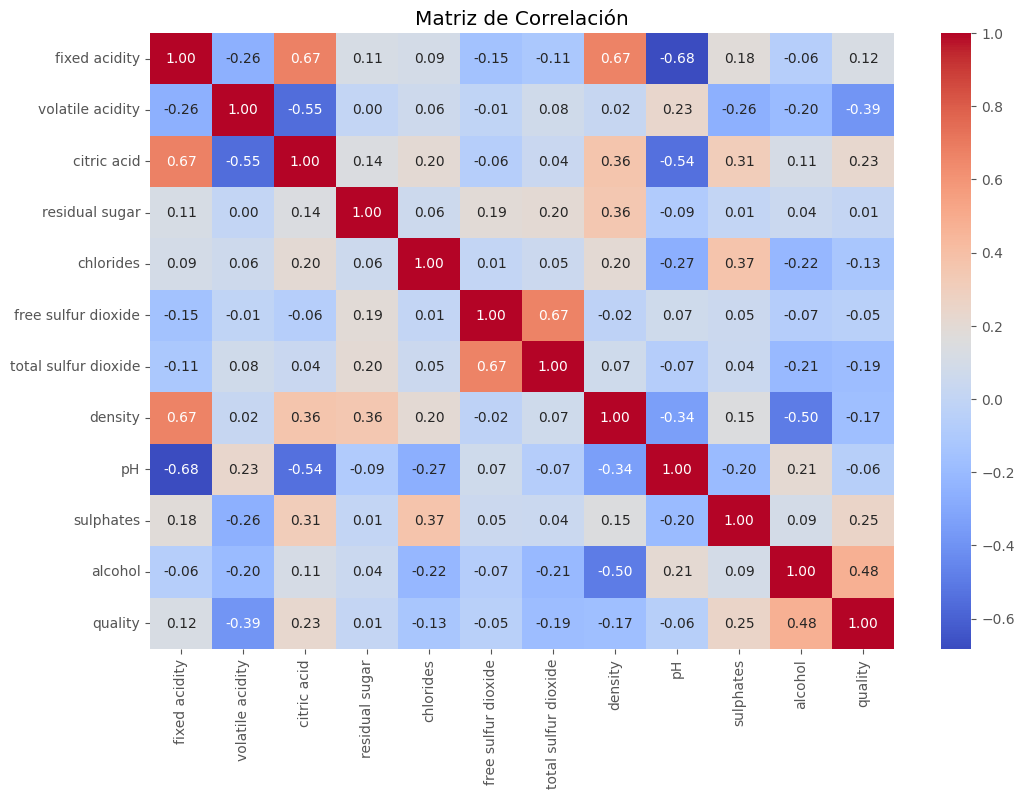

In [ ]:
# Graficar la matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlación')
plt.show()

Evidenciamos que la variable de calidad ("quality") no se encuentra altamente correlacionada con ninguna de las 11 variables fisico-quimicas. Se observa una correlación positiva de mediana intensidad entre las variables de calidad y alcohol, sin embargo cabe aclarar que una no indica causalidad de la otra.

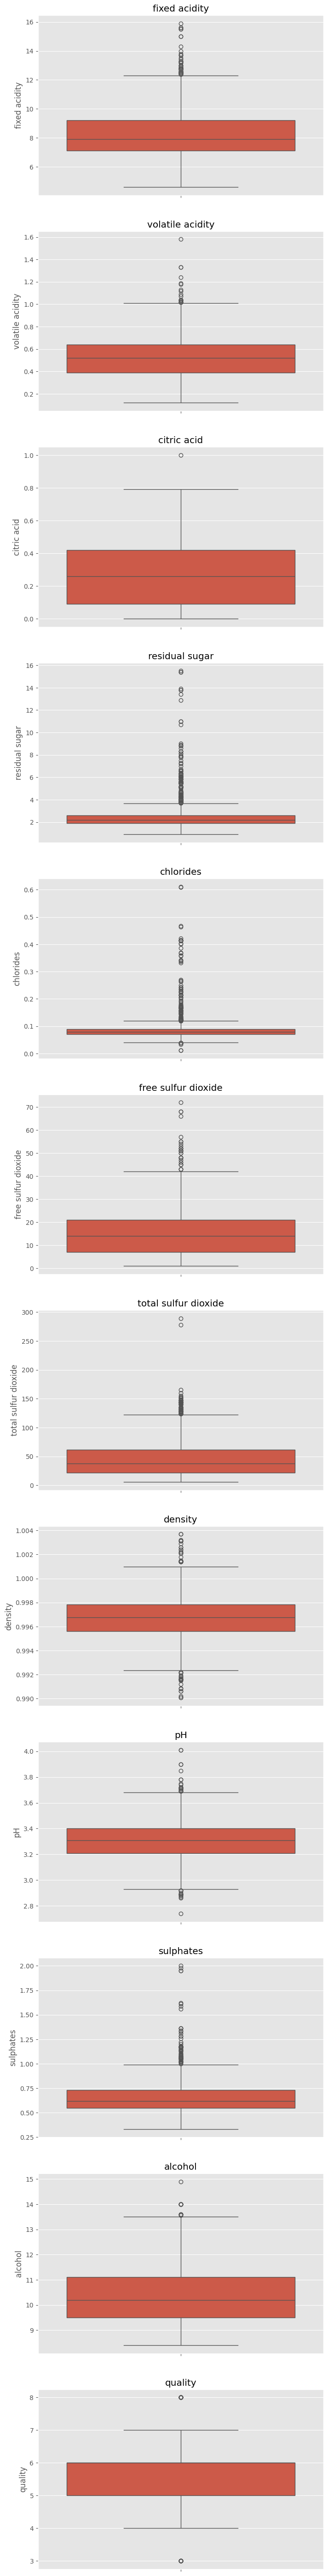

<Figure size 600x600 with 0 Axes>

In [ ]:
# Transponer el DataFrame
df_transpuesto = df.T

# Crear un gráfico de boxplot para cada fila transpuesta
fig, axs = plt.subplots(len(df_transpuesto), 1, figsize=(8, 6*len(df_transpuesto)), sharex=True)

for i, columna in enumerate(df_transpuesto.index):
    sns.boxplot(data=df_transpuesto.loc[columna], ax=axs[i])
    axs[i].set_title(columna)
    axs[i].set_xlabel('')

plt.figure(figsize=(6,6))
plt.tight_layout()

plt.show()

Se observa que la mayoria de las variables presenta alta dispersión en los datos, sin embargo no se observan registros que requieran ser depurados para el desarrollo de la actividad.

 6. La variable quality es la variable objetivo, con lo consultado anteriormente haga una regresión lineal para predecir quality. Evalue los valores del error cuadrático medio y R2. Haga sus conclusiones, si ve la posibilidad de reentrenar el modelo y mejorar sus resultados hágalo.

In [ ]:
model_result = {}
x, y = df.drop('quality', axis='columns'), df['quality']

y.shape

(1599,)

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos (por ejemplo, el conjunto de datos de diabetes)
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

# Crear un estimador LassoCV
lasso_cv = LassoCV(cv=5, random_state=0)

# Ajustar el modelo LassoCV
lasso_cv.fit(x_train, y_train)

# Obtener el valor óptimo de alpha
optimal_alpha = lasso_cv.alpha_
print("Valor óptimo de alpha:", optimal_alpha)

Valor óptimo de alpha: 0.005450087141720983


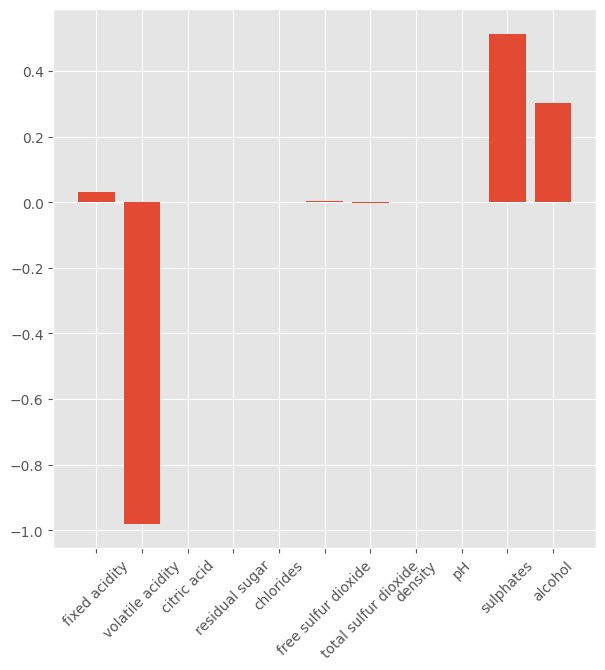

In [ ]:
from sklearn.linear_model import Lasso

names = df.drop("quality", axis=1).columns
lasso = Lasso(alpha=optimal_alpha)
lasso_coef = lasso.fit(x, y).coef_
plt.figure(figsize=(7,7))
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crear un objeto Lasso
lasso = Lasso(alpha=optimal_alpha)

# Ajustar el modelo
lasso.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = lasso.predict(X_test)

# Calcular el error (por ejemplo, usando MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)
rmse = sqrt(mse)
print("RMSE:", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MSE: 0.4596695191600926
R2: 0.3044778243100438
RMSE: 0.6779893208304189
MAE: 0.5061164566522807


Text(0.5, 0, 'Experimental Quality')

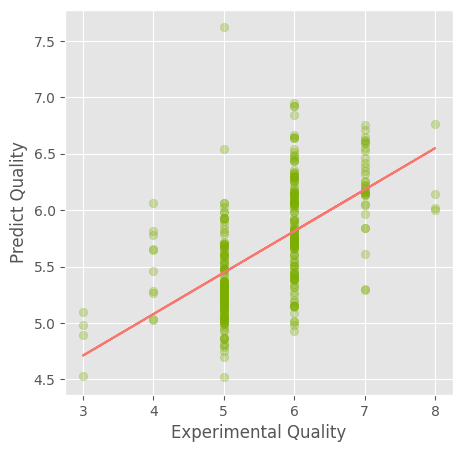

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Quality')
plt.xlabel('Experimental Quality')

En este reentramiento que usamos el modelo lasso, el cual ajusta la magnitud de cada categoría con un alpha optimo calculado, nos da una efectividad del 30% de los datos de prueba.

Finalmente podemos concluir que el modelo que utiliza todas las variables obtuvo un mejor resultado frente a los otros dos modelos generados.